In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

https://www.kaggle.com/datasets/uciml/adult-census-income/data

In [2]:
# Cargar el conjunto de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
                'hours_per_week', 'native_country', 'income']
df = pd.read_csv(
    url,
    header=None, 
    names=column_names, 
    na_values=' ?' # en el dataframe los valores nulos vienen como " ?"
)

Data description:
* age: Age of the individual.
* workclass: Category of the work class to which the individual belongs.
* fnlwgt: Final weight, which represents the number of people in the population that the individual represents.
* education: Educational level achieved by the individual.
* education_num: Number associated with the individual's educational level.
* marital_status: Marital status of the individual.
* occupation: Occupation of the individual.
* relationship: Relationship of the individual with the head of the household.
* race: Race of the individual.
* sex: Sex of the individual.
* capital_gain: Capital gain obtained.
* capital_loss: Capital loss incurred.
* hours_per_week: Number of hours worked per week.
* native_country: Country of origin of the individual.
*income: Individual's income (if greater or less than 50K per year).

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

## Data Cleaning


1. Check for null values. If there are any, check if the number of nulls in the column is greater than 40%. If the nulls exceed 40%, eliminate the column, otherwise complete it as you deem appropriate.

 It is recommended to make graphs to visually see the behavior of the data

In [5]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [6]:
df["workclass"].isnull().sum()/len(df["workclass"])

0.05638647461687295

In [7]:
df["occupation"].isnull().sum()/len(df["workclass"])

0.056601455729246644

In [8]:
df["native_country"].isnull().sum()/len(df["workclass"])

0.0179048555019809

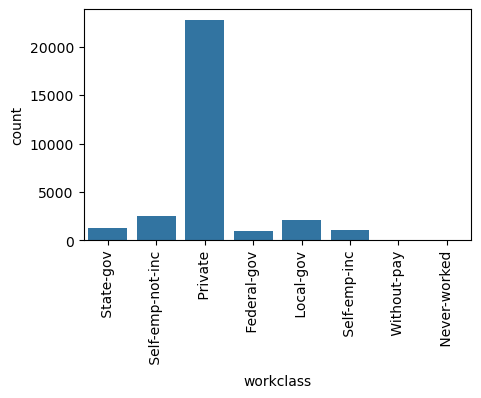

In [9]:
# workclass
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = "workclass")
plt.xticks(rotation = 90)
plt.show()

In [10]:
valor = df.workclass.mode()
df.workclass.fillna(valor[0],inplace=True)

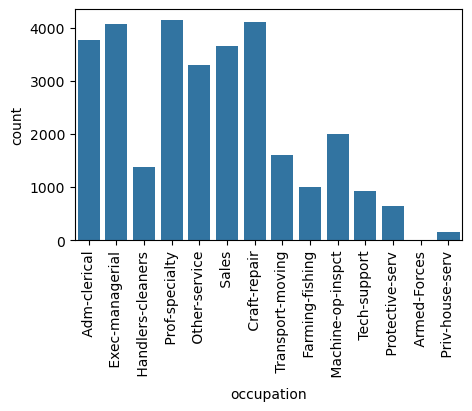

In [11]:
# workclass
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = "occupation")
plt.xticks(rotation = 90)
plt.show()

In [12]:
# no se ve una tendencia tan firme hacia un valor, por lo que el criterio de la moda ya no es el mejor

# Puedo asignarle un valor extra que sea "Sin-datos" o hacer una regresión para predecir ese valor 

# vamos a ir por el camino de sin datos que es más sencillo
df.occupation.fillna("Sin-datos",inplace=True)

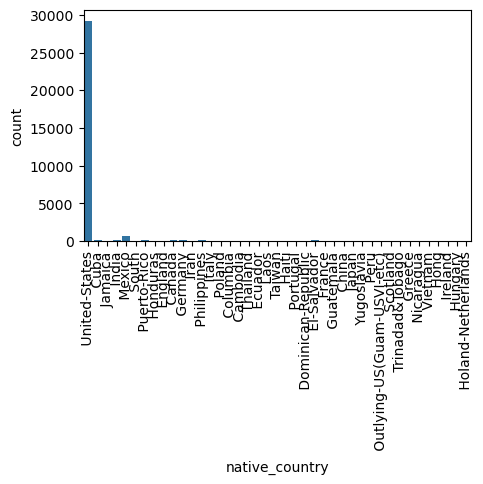

In [13]:
# native_country
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = "native_country")
plt.xticks(rotation = 90)
plt.show()

In [14]:
valor = df.native_country.mode()
df.native_country.fillna(valor[0],inplace=True)

In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

2. Perform a countplot of all the categorical variables that you have not graphed and try to identify patterns, data to group or columns to eliminate.

In [15]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

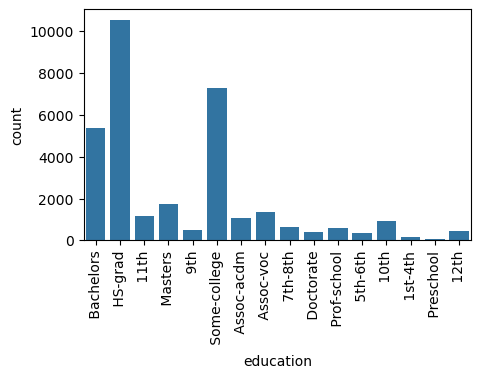

In [16]:
#education
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = "education")
plt.xticks(rotation = 90)
plt.show()

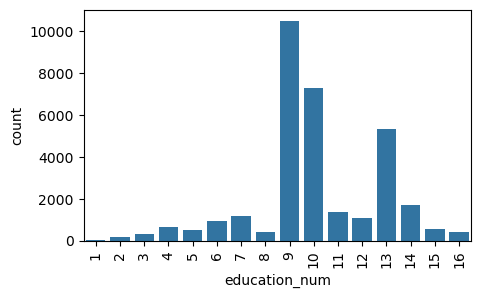

In [17]:
#education_num
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = "education_num")
plt.xticks(rotation = 90)
plt.show()

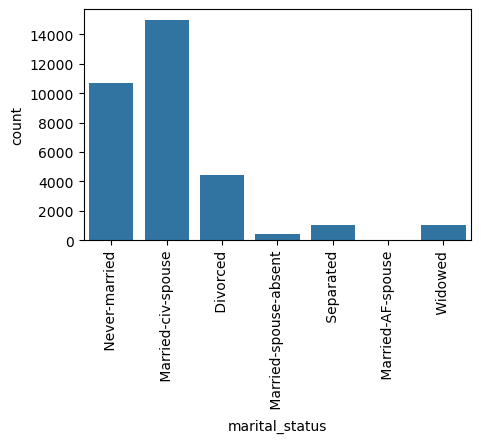

In [18]:
#marital_status
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = "marital_status")
plt.xticks(rotation = 90)
plt.show()

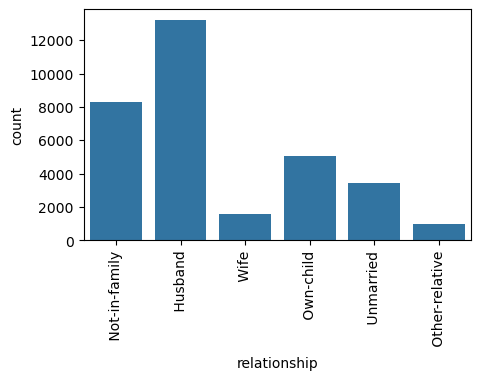

In [19]:
# relationship
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = "relationship")
plt.xticks(rotation = 90)
plt.show()

3. Code binary categorical variables to 0 and 1. (Income and Sex)

In [18]:
df.income.unique()
df["income"].replace(" <=50K",0).replace(" >50K",1)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [ ]:
df["income"]=df["income"].replace("<=50K",0).replace(">50K",1)
df["income"]

In [20]:
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
df['sex'] = df['sex'].map({' Male': 0, ' Female': 1})

4. Reduce education column by 5 values

*Primary or Less: 'Preschool', '1st-4th', '5th-6th'
* Incomplete Secondary: '7th-8th', '9th', '10th', '11th', '12th'
* Complete Secondary: 'HS-grad'
* Incomplete Technical/University Education: 'Some-college', 'Assoc-acdm', 'Assoc-voc'
* University Degree or Higher: 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'

In [21]:
education_mapping = {
    ' Preschool': 'Primaria o Menos',
    ' 1st-4th': 'Primaria o Menos',
    ' 5th-6th': 'Primaria o Menos',
    ' 7th-8th': 'Secundaria Incompleta',
    ' 9th': 'Secundaria Incompleta',
    ' 10th': 'Secundaria Incompleta',
    ' 11th': 'Secundaria Incompleta',
    ' 12th': 'Secundaria Incompleta',
    ' HS-grad': 'Secundaria Completa',
    ' Some-college': 'Educación Técnica/Universitaria Incompleta',
    ' Assoc-acdm': 'Educación Técnica/Universitaria Incompleta',
    ' Assoc-voc': 'Educación Técnica/Universitaria Incompleta',
    ' Bachelors': 'Grado Universitario o Superior',
    ' Masters': 'Grado Universitario o Superior',
    ' Prof-school': 'Grado Universitario o Superior',
    ' Doctorate': 'Grado Universitario o Superior'
}

df['education'] = df['education'].map(education_mapping)

5. Since the education and education_num columns provide the same information, remove education_num

In [22]:
df.drop(columns= "education_num",inplace=True, axis = "columns")

6. Reduce relationship column by 4 values

* Husband/Wife: Includes 'Wife', 'Husband'.
* Child: Includes 'Own-child'.
* Other Relative: Includes 'Other-relative'.
* Not in Family: Includes 'Not-in-family', 'Unmarried'.

In [23]:
# Agrupar relaciones en categorías más amplias
relationship_mapping = {
    ' Wife': 'Esposo/Esposa',
    ' Own-child': 'Hijo',
    ' Husband': 'Esposo/Esposa',
    ' Not-in-family': 'No en Familia',
    ' Other-relative': 'Otro Pariente',
    ' Unmarried': 'No en Familia'
}

df['relationship'] = df['relationship'].map(relationship_mapping)

7. Reduce marital_status column by 3 values

* Married: Includes 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'.
* Not Married: Includes 'Never-married'.
* Separated/Divorced/Widowed: Includes 'Divorced', 'Separated', 'Widowed'.

In [24]:
# Agrupar estados civiles en categorías más amplias
marital_status_mapping = {
    ' Married-civ-spouse': 'Casado',
    ' Divorced': 'Separado/Divorciado/Viudo',
    ' Never-married': 'No Casado',
    ' Separated': 'Separado/Divorciado/Viudo',
    ' Widowed': 'Separado/Divorciado/Viudo',
    ' Married-spouse-absent': 'Casado',
    ' Married-AF-spouse': 'Casado'
}

df['marital_status'] = df['marital_status'].map(marital_status_mapping)

8. Since almost all people were born in the US, modify the native-country column so that the values ​​are "United-States" or "Other"

In [25]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [26]:
df["native_country"] = np.where(df["native_country"] == " United-States", "United-States", "Other")

9. Reduce workclass column by 4 values

* Private: Includes 'Private'.
* Self-employed: Includes 'Self-emp-not-inc', 'Self-emp-inc'.
* Government: Includes 'Federal-gov', 'Local-gov', 'State-gov'.
* Without Payment/Not Worked: Includes 'Without-pay', 'Never-worked'.

In [27]:
# Agrupar workclass en categorías más amplias
workclass_mapping = {
    ' Private': 'Privado',
    ' Self-emp-not-inc': 'Autónomo',
    ' Self-emp-inc': 'Autónomo',
    ' Federal-gov': 'Gobierno',
    ' Local-gov': 'Gobierno',
    ' State-gov': 'Gobierno',
    ' Without-pay': 'Sin Pago/No Trabajado',
    ' Never-worked': 'Sin Pago/No Trabajado'
}

df['workclass'] = df['workclass'].map(workclass_mapping)

10. Convert categorical variables to dummy variables

In [28]:
df = pd.get_dummies(
    df, 
    columns=['workclass', 'education', 'marital_status', 'occupation', 
             'relationship', 'race', 'native_country'], 
    drop_first=True
)

## Generate model


11. Split data into train and testing

In [29]:
X = df.drop(columns='income')
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size = 0.75
    test_size=0.25
)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(24420, 37) (8141, 37) (24420,) (8141,)


In [31]:
df.columns

Index(['age', 'fnlwgt', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'workclass_Gobierno', 'workclass_Privado',
       'workclass_Sin Pago/No Trabajado',
       'education_Grado Universitario o Superior',
       'education_Primaria o Menos', 'education_Secundaria Completa',
       'education_Secundaria Incompleta', 'marital_status_No Casado',
       'marital_status_Separado/Divorciado/Viudo', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'occupation_Sin-datos', 'relationship_Hijo',
       'relationship_No en Familia', 'relationship_Otro Pariente',
       'race_ Asian-Pac-Isla

12. Create a decision tree model to predict income. Try different depths until you consider that you have the optimal depth based on the accuracy of the model

In [55]:
# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=10)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del Árbol de Decisión: {accuracy:.2f}')

Accuracy del Árbol de Decisión: 0.83


13. Create tree

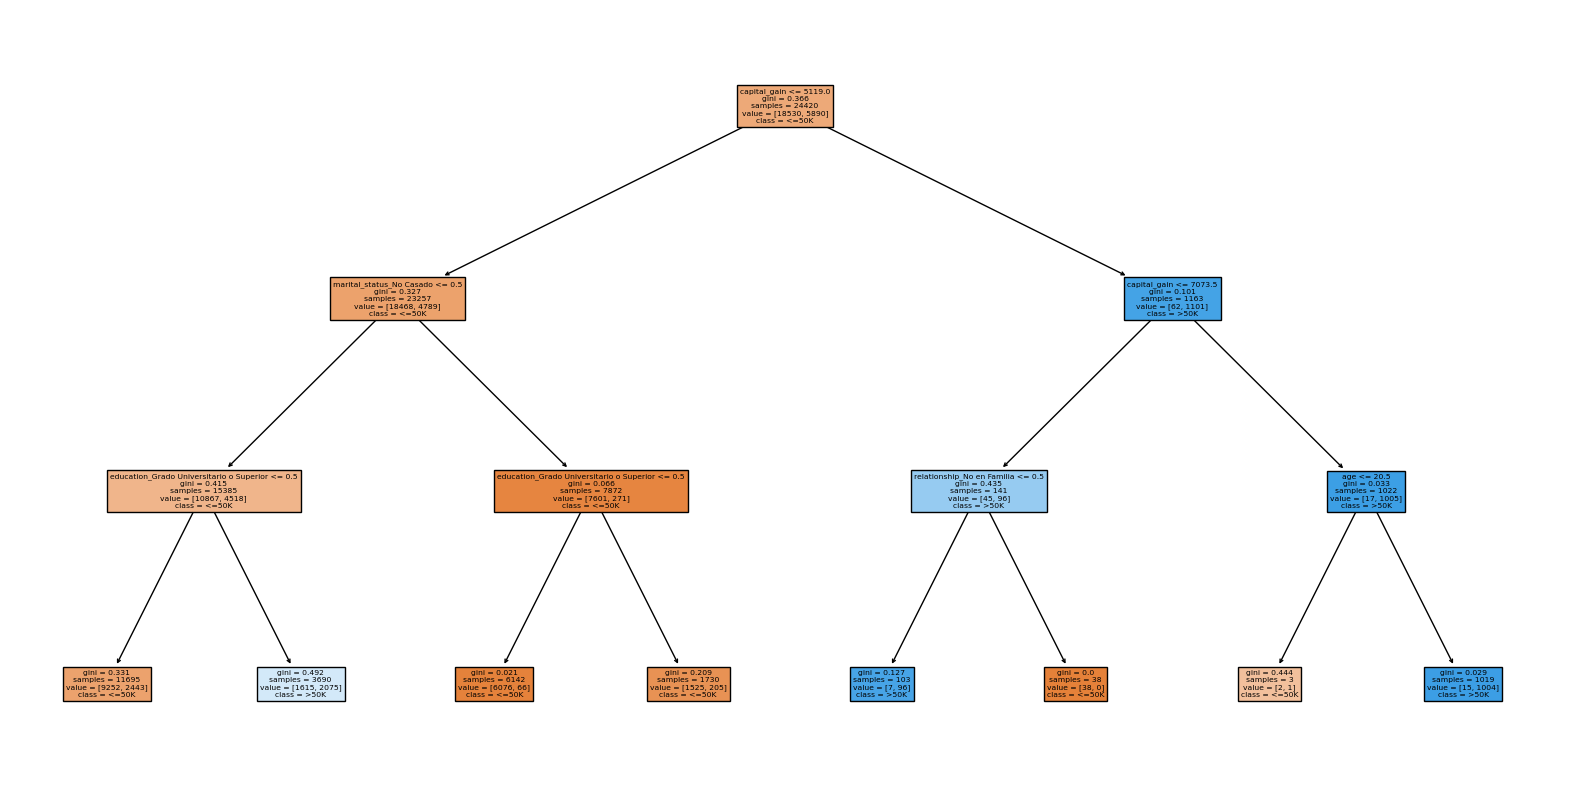

In [57]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.show()

14. Random Forest

In [59]:
# Crear el modelo de random forest
rf_clf = RandomForestClassifier()

# Entrenar el modelo
rf_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_clf.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy del Random Forest: {accuracy_rf:.2f}')

Accuracy del Random Forest: 0.86
